# Weather Changes Over Time (Consuming APIs)

## Task
Utilize the following two APIs to evaluate the changes in temperature for your birthday and city you were born in:
* [geocode.xyz](geocode.xyz)
* [open-meteo.com](open-meteo.com)


In [1]:
from datetime import date, datetime, timedelta

import requests
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

sns.set_palette('muted')
sns.set_style('white')

## Question 1: Geocoding A Location

> Indented block
> 


Write a function that utilizes the [geocode.xyz](geocode.xyz) API to take in a city and country and return the latitude and longitude of that location

```
def geocode_location(city, country):
    # your code
    return latitude, longitude
```

For example:
```
geocode_location("london", "united kingdom")
```
should return
```
(-0.11534, 51.49742)
```

In [2]:
# write your solution here


def geocode_location(city, country):
    url = f"https://geocode.xyz/{city},{country}"         # ? indicated start of query string
    r = requests.get(url,
                    params = {'json':1}).json()
    # json response
    return (float(r['latt']), float(r['longt']))

In [3]:
city, country = ('london', 'united kingdom')
geocode_location(city, country)

(51.51417, -0.11485)

## Question 2: Determining Weather Using Date and Location
Write a function that utilizes the [open-meteo.com](https://open-meteo.com/) API to take in a date and location and return the 15-day average high and low for the following measurements from the years 1960 to 2022:
* `precipitation_sum` (mm): Sum of daily precipitation (including rain, showers and snowfall)
* `temperature_2m_max` (°F): Maximum daily air temperature at 2 meters above ground
* `temperature_2m_min` (°F): Minimum daily air temperature at 2 meters above ground
* `apparent_temperature_max` (°F): Maximum daily apparent temperature
* `apparent_temperature_min` (°F): Min daily apparent temperature

The function should return the above measurements in a dictionary object with the keys being `"precipitation_sum"`, `"temperature_2m_max"`, etc. and the values being the 15-day average of the measurements. The 15-day average should be the 7 days preceeding the input date, the input date, and the 7 days following the input date. This will give the results more statistical validity by increasing the number of samples for each measurement.

The `get_historical_weather_measurements()` function will include a few different sub-tasks:

### Create API Request in Postman/Insomnia
Use the following [API Documentation](https://open-meteo.com/en/docs/historical-weather-api#api-documentation) page to create an API request that responds with a JSON object of the measurements listed above. Make sure the response object meets the following:
* Temperatue measurements are in Fahrenheit
* Precipitation measurements are in inches
* Measurements are daily aggregations
* 15 day range of weather
* JSON format

Before writing any code, use Postman/Insomnia to create the API request and take a screenshot of the request/response.

#### HINT: How to insert a screenshot
1. Take a screenshot and save it to a file.
2. Create a markdown cell in your notebook.
3. Insert the image into the markdown cell.
  * Option 1: Drag the image file into the markdown cell. This embeds the image data directly into your Jupyter notebook.
  * Option 2: Move the file into the directory with your notebook file (inside the project folder that you will submit). Add markdown to insert the image: `![alternative text](path-to-image)`

### Create API Request Function
Convert the request above into a function. The function should take in `latitude`, `longitude`, and `date` as its arguments and return the API response, if successful.

```
def get_api_response(latitude, longitude, date):
    # your code

```

Use the helper function below for creating a 15-day date range


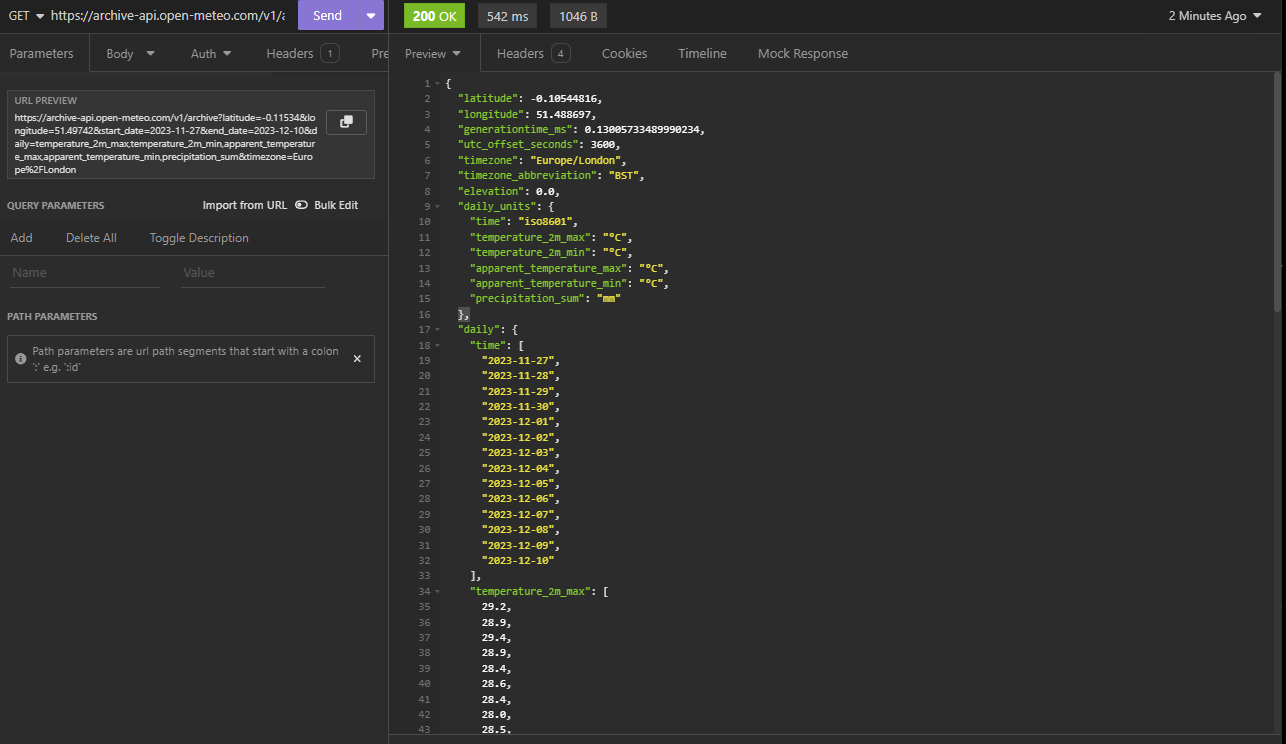

In [4]:
# helper function for 15-day date range
from datetime import datetime, timedelta

def get_date_range(birthday):
    return {'start_date': birthday - timedelta(days=7),
            'end_date': birthday + timedelta(days=7)
           }


In [ ]:
    url = f"https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}"


In [18]:
# write your solution here
def get_api_response(latitude, longitude, birthday):
    # url
    url = "https://archive-api.open-meteo.com/v1/archive"
    # define date range calling get_date_range
    date_range = get_date_range(birthday)
    response = requests.get(url, 
                            params = {'latitude': latitude,
                             'longitude': longitude,
                             'start_date': date_range['start_date'],
                             'end_date': date_range['end_date'],
                             'daily': ['temperature_2m_max','temperature_2m_min','apparent_temperature_max','apparent_temperature_min','precipitation_sum'],
                             'timezone': 'auto',
                             'temperature_unit': 'fahrenheit',
                             'precipitation_unit': 'inch'                             
                            })
    if response.status_code == 200:
        return response.json()
    else:
        return None



In [9]:
url = 'https://archive-api.open-meteo.com/v1/archive'
jr = r.json()
jr

{'latitude': 51.493847,
 'longitude': -0.1630249,
 'generationtime_ms': 0.4919767379760742,
 'utc_offset_seconds': 3600,
 'timezone': 'Europe/London',
 'timezone_abbreviation': 'BST',
 'elevation': 11.0,
 'daily_units': {'time': 'iso8601',
  'temperature_2m_max': '°C',
  'temperature_2m_min': '°C',
  'apparent_temperature_max': '°C',
  'apparent_temperature_min': '°C',
  'precipitation_sum': 'mm'},
 'daily': {'time': ['2023-11-27',
   '2023-11-28',
   '2023-11-29',
   '2023-11-30',
   '2023-12-01',
   '2023-12-02',
   '2023-12-03',
   '2023-12-04',
   '2023-12-05',
   '2023-12-06',
   '2023-12-07',
   '2023-12-08',
   '2023-12-09',
   '2023-12-10'],
  'temperature_2m_max': [9.7,
   6.6,
   4.4,
   4.5,
   4.1,
   -0.4,
   7.7,
   7.9,
   6.3,
   4.4,
   8.3,
   10.9,
   13.9,
   11.8],
  'temperature_2m_min': [5.0,
   0.8,
   -1.0,
   -2.7,
   -2.1,
   -3.8,
   -0.3,
   5.7,
   3.4,
   0.8,
   4.1,
   5.6,
   7.4,
   7.0],
  'apparent_temperature_max': [7.5,
   3.4,
   1.6,
   0.0,
   

### Iterating Over Each Year
Write a function that iterates through each year between 1960 and 2022 and returns the corresponding JSON response objects containing weather data for each year in a python list.

```
def get_all_response_objects(start_year, end_year):
    # your code
```


In [19]:
def get_all_response_objects(latitude, longitude, birthday):
    # create responses list
    responses = []
    # create for loop to go through all years from 1960-2023
    # with requests defined and responses
    for year in range(1960, 2023):
        request_date = date(year, birthday.month, birthday.day)
        response = get_api_response(latitude, longitude, request_date)
        # add responses to the list
        responses.append(response)
    return responses

In [21]:
responses = get_all_response_objects(51.51413, -0.11534, date(2000, 12, 1))
print(responses)

[{'latitude': 51.493847, 'longitude': -0.1630249, 'generationtime_ms': 0.661015510559082, 'utc_offset_seconds': 3600, 'timezone': 'Europe/London', 'timezone_abbreviation': 'BST', 'elevation': 30.0, 'daily_units': {'time': 'iso8601', 'temperature_2m_max': '°F', 'temperature_2m_min': '°F', 'apparent_temperature_max': '°F', 'apparent_temperature_min': '°F', 'precipitation_sum': 'inch'}, 'daily': {'time': ['1960-11-24', '1960-11-25', '1960-11-26', '1960-11-27', '1960-11-28', '1960-11-29', '1960-11-30', '1960-12-01', '1960-12-02', '1960-12-03', '1960-12-04', '1960-12-05', '1960-12-06', '1960-12-07', '1960-12-08'], 'temperature_2m_max': [54.4, 55.0, 54.4, 50.4, 43.0, 50.1, 52.2, 53.3, 48.0, 55.0, 53.4, 46.0, 44.0, 42.8, 40.5], 'temperature_2m_min': [46.4, 45.5, 49.6, 40.5, 29.0, 36.5, 48.9, 47.7, 41.5, 41.4, 43.2, 34.5, 32.5, 35.2, 33.6], 'apparent_temperature_max': [45.9, 49.1, 47.4, 45.6, 36.3, 44.9, 45.1, 46.1, 41.4, 45.6, 43.0, 39.5, 38.6, 39.0, 36.0], 'apparent_temperature_min': [38.5, 

### Parse JSON Responses & Aggregate Data
Write a function that takes the list of JSON response objects from the previous function in as a parameter and returns a pandas DataFrame containing the original input date, the measurements, and the average across the 15 days.
```
def parse_json_response(responses):
    # your code
```


In [28]:
# write your solution here
def parse_json_response(responses):
    # create df
    df = pd.DataFrame(responses)
    # join the df ('daily' is a nested dictionary). unnest it and drop the column
    df = df.join(pd.json_normalize(df['daily'])).drop(columns=['daily'])
    
# get avg of measurements
# define measures
    measures = ['temperature_2m_max', 'temperature_2m_min',
                'apparent_temperature_max', 'apparent_temperature_min',
                'precipitation_sum'] 
    # create for loop to loop through each column to find the avg
    for col in measures:
        df[f'{col}_mean'] = df[col].apply(np.mean)
    # add year column
    df['year'] = df['time'].apply(lambda x: x[0][:4])

    return df[['year']+ [measure + '_mean' for measure in measures]]

In [29]:
df = parse_json_response(responses)

### Combining the Functions
Write a function that combines all the above functions into one, where the user inputs their birthday and location and the function returns the pandas DataFrame containing the summary of measurements.

```
def get_data():
    birthday = get_user_birthday()
    location = get_user_city_of_birth()
    # your code here
```

The helper functions below can be used for birthday and location input information:

In [30]:
# helper functions
def get_user_birthday():
    birthday = input('Enter your birthday (MM/DD/YYYY): ')
    return datetime.strptime(birthday, "%m/%d/%Y")

def get_user_city_of_birth():
    city = input('Enter the city you were born in: ')
    country = input('Enter the country you were born in: ')
    return city , country

In [31]:
# write your solution here
def get_data():
    birthday = get_user_birthday()
    location = get_user_city_of_birth()
    
    latitude, longitude = geocode_location(*location)
    
    responses = get_all_response_objects(latitude, longitude, birthday)
    
    return parse_json_response(responses)

Run your function and set it equal to `df`:

In [32]:
df = get_data()

df.head()

Enter your birthday (MM/DD/YYYY):  12/03/2000
Enter the city you were born in:  kentucky
Enter the country you were born in:  united states


,year,temperature_2m_max_mean,temperature_2m_min_mean,apparent_temperature_max_mean,apparent_temperature_min_mean,precipitation_sum_mean
0,1960,45.980000,30.540000,37.980000,21.746667,0.100400
1,1961,45.260000,31.553333,38.500000,24.060000,0.039133
2,1962,48.006667,36.913333,42.400000,29.460000,0.059933
3,1963,46.860000,30.626667,37.986667,21.280000,0.004467
4,1964,33.626667,18.900000,25.993333,9.520000,0.086067


## Question 3: Visualizing The Data
Plot the DataFrame using `matplotlib`/`seaborn` 

In [33]:
# run test make sure we have all the right columns
df.columns

Index(['year', 'temperature_2m_max_mean', 'temperature_2m_min_mean',
       'apparent_temperature_max_mean', 'apparent_temperature_min_mean',
       'precipitation_sum_mean'],
      dtype='object')

In [34]:
# transform into a wide format df
df_melted = df.melt(id_vars='year',
                    value_vars=['temperature_2m_max_mean', 'temperature_2m_min_mean',
                                'apparent_temperature_max_mean', 'apparent_temperature_min_mean',
                                'precipitation_sum_mean'],
                    var_name='measurement'
                   )

**Temperate Measurements**

C:\Users\rdog0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rdog0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


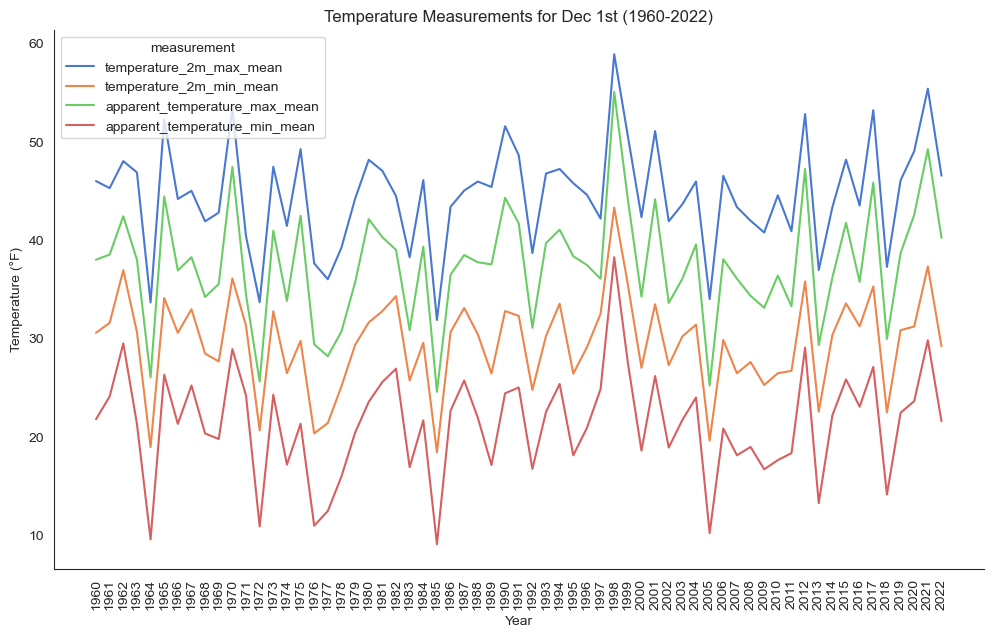

In [35]:
# plot the graph
plt.figure(figsize=(12, 7))

temp_measures = ['temperature_2m_max_mean', 'temperature_2m_min_mean',
                 'apparent_temperature_max_mean', 'apparent_temperature_min_mean']

sns.lineplot(data=df_melted.loc[df_melted['measurement'].isin(temp_measures)],
             x='year',
             y='value',
             hue='measurement')

plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.title(f"Temperature Measurements for Dec 1st (1960-2022)")
plt.xticks(rotation=90)

sns.despine()

**Precipitation Measurements**

C:\Users\rdog0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rdog0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


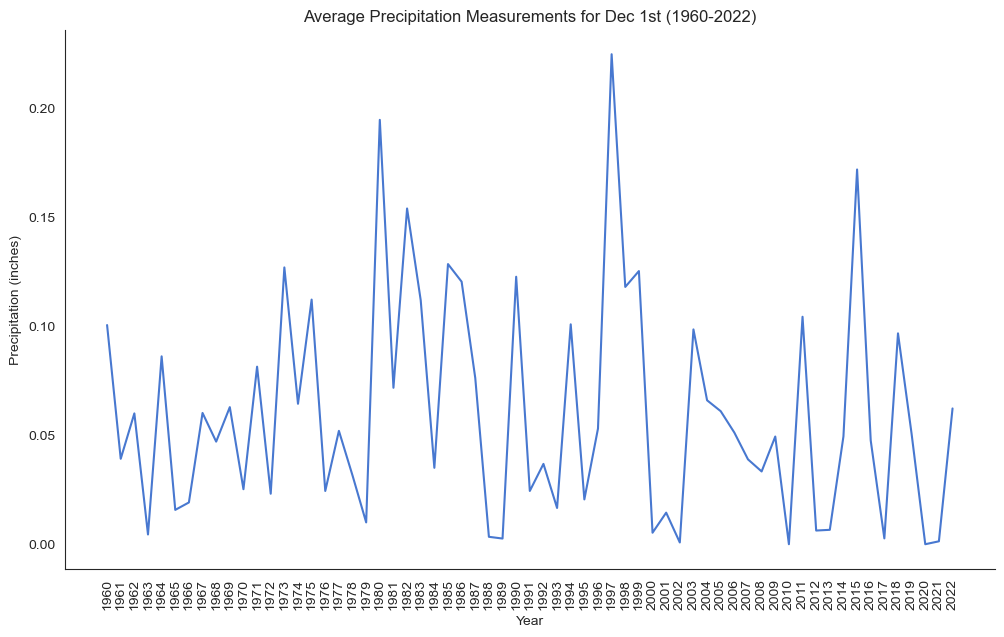

In [38]:
plt.figure(figsize=(12, 7))

sns.lineplot(data=df_melted.loc[df_melted['measurement'] == 'precipitation_sum_mean'],
             x='year',
             y='value')

plt.xlabel("Year")
plt.ylabel("Precipitation (inches)")
plt.title(f"Average Precipitation Measurements for Dec 1st (1960-2022)")
plt.xticks(rotation=90)

sns.despine()